Accuracy del modelo: 0.9649
Incertidumbre de la primera muestra: 0.0000


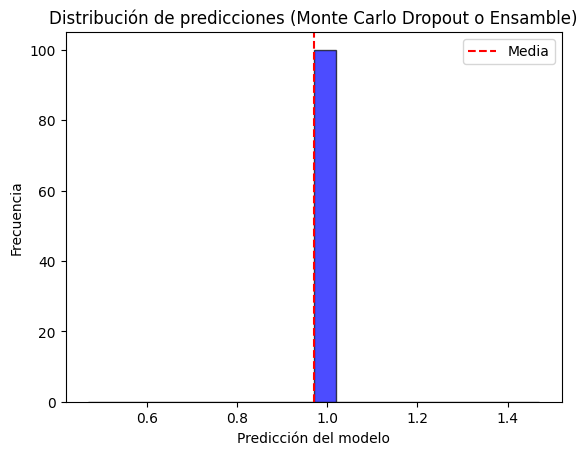

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Función generalizada para estimar la incertidumbre
def uncertainty_analysis(model, X_train, y_train, X_test, n_simulations=100):
    
    # Asegurarse de que el modelo tenga probabilidades
    if not hasattr(model, 'predict_proba'):
        raise ValueError("El modelo debe implementar 'predict_proba' para análisis de incertidumbre.")
    
    # Realizar múltiples predicciones para estimar la incertidumbre
    predictions = np.array([model.predict_proba(X_test)[:, 1] for _ in range(n_simulations)])
    
    # Calcular la varianza entre las predicciones (incertidumbre)
    uncertainty = np.var(predictions, axis=0)
    
    return uncertainty, predictions

# Ejemplo con cualquier modelo
def run_example(model, X, y):
    """
    Función de ejemplo que entrena un modelo y aplica el análisis de incertidumbre.
    """
    # Dividir el conjunto de datos en entrenamiento y test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Evaluar el modelo
    y_pred = model.predict(X_test)
    print(f"Accuracy del modelo: {accuracy_score(y_test, y_pred):.4f}")
    
    # Realizar análisis de incertidumbre
    uncertainty, predictions = uncertainty_analysis(model, X_train, y_train, X_test)
    
    # Mostrar incertidumbre para la primera muestra de test
    print(f"Incertidumbre de la primera muestra: {uncertainty[0]:.4f}")
    
    # Graficar la distribución de predicciones para la primera muestra
    plt.hist(predictions[:, 0], bins=20, alpha=0.7, color="blue", edgecolor="black")
    plt.axvline(np.mean(predictions[:, 0]), color="red", linestyle="dashed", label="Media")
    plt.xlabel("Predicción del modelo")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de predicciones (Monte Carlo Dropout o Ensamble)")
    plt.legend()
    plt.show()

# Ejemplo con RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Cargar el dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Usar Random Forest como modelo de ejemplo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ejecutar el ejemplo
run_example(rf_model, X, y)
